# Import and Load

In [17]:
import time
import math
import numpy as np
import pandas as pd

import scipy.stats as stats

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD, PCA

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import (roc_curve, roc_auc_score, precision_recall_curve, classification_report, average_precision_score,
                            PrecisionRecallDisplay)
                            

import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')


In [18]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")
pd.set_option('display.max_columns', None)


In [19]:
# eliminating annoying lgbm warnings, source: https://stackoverflow.com/a/33616192/1105837
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from lightgbm.sklearn import LGBMClassifier
import lightgbm as lgbm
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [57]:
data = pd.read_csv('train.csv')
print("There are {:,} rows and {} columns in the data.".format(data.shape[0], data.shape[1]))
print("There are {} missing values in the data.".format(data.isnull().sum().sum()))
data.head()

There are 1,677 rows and 35 columns in the data.
There are 0 missing values in the data.


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1677 non-null   int64 
 1   Age                       1677 non-null   int64 
 2   BusinessTravel            1677 non-null   object
 3   DailyRate                 1677 non-null   int64 
 4   Department                1677 non-null   object
 5   DistanceFromHome          1677 non-null   int64 
 6   Education                 1677 non-null   int64 
 7   EducationField            1677 non-null   object
 8   EmployeeCount             1677 non-null   int64 
 9   EnvironmentSatisfaction   1677 non-null   int64 
 10  Gender                    1677 non-null   object
 11  HourlyRate                1677 non-null   int64 
 12  JobInvolvement            1677 non-null   int64 
 13  JobLevel                  1677 non-null   int64 
 14  JobRole                 

In [59]:
original_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print("There are {:,} rows and {} columns in the data.".format(original_data.shape[0], original_data.shape[1]))
print("There are {} missing values in the data.".format(original_data.isnull().sum().sum()))
print(original_data.info())

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   i

In [60]:
original_data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [61]:
original_data = original_data.rename(columns={'EmployeeNumber': 'id'})

In [62]:
#convert "yes" and "no" to 1 and 0
original_data['Attrition'] = (original_data['Attrition'] == 'Yes').astype(int)

In [63]:
#arrange the columns
original_data = original_data[data.columns.to_list()]

In [64]:
original_data['source'] = 'original'
data['source'] = 'synthetic'

In [65]:
#combining the datasets
df = pd.concat([data, original_data])
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        3147 non-null   int64 
 1   Age                       3147 non-null   int64 
 2   BusinessTravel            3147 non-null   object
 3   DailyRate                 3147 non-null   int64 
 4   Department                3147 non-null   object
 5   DistanceFromHome          3147 non-null   int64 
 6   Education                 3147 non-null   int64 
 7   EducationField            3147 non-null   object
 8   EmployeeCount             3147 non-null   int64 
 9   EnvironmentSatisfaction   3147 non-null   int64 
 10  Gender                    3147 non-null   object
 11  HourlyRate                3147 non-null   int64 
 12  JobInvolvement            3147 non-null   int64 
 13  JobLevel                  3147 non-null   int64 
 14  JobRole                 

In [66]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,source
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0,synthetic
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0,synthetic
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0,synthetic
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0,synthetic
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1,synthetic


In [67]:
df.to_csv('clena_df.csv',index=False)

# Summary Statistics of Numeric Var

In [68]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.0,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.0,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000,3147.000000
mean,925.286940,36.451223,850.586273,8.921513,2.926279,1.0,2.741023,66.907531,2.757865,2.029234,2.762313,6339.397521,14556.604067,2.630124,15.046393,3.139816,2.733079,80.0,0.755323,10.975850,2.763902,2.765809,6.900858,4.183985,2.076263,4.156975,0.138862
std,550.325205,8.815861,390.859919,7.961278,1.032051,0.0,1.089733,19.877918,0.680183,1.094590,1.100224,4610.584686,7117.334257,2.488848,3.537252,0.346851,1.079454,0.0,0.810688,7.509438,1.214918,0.675707,5.998015,3.601691,3.130744,3.572003,0.345858
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,452.000000,30.000000,543.000000,2.000000,2.000000,1.0,2.000000,50.000000,2.000000,1.000000,2.000000,2888.000000,8306.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,914.000000,35.000000,852.000000,7.000000,3.000000,1.0,3.000000,67.000000,3.000000,2.000000,3.000000,4877.000000,14908.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1379.000000,42.000000,1198.500000,13.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,7725.000000,20744.500000,4.000000,17.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,2068.000000,60.000000,3921.000000,29.000000,15.000000,1.0,4.000000,100.000000,4.000000,7.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


# Summary Statistics of Category Var

In [69]:
cat_cols=df.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(df[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(df.select_dtypes(include=object).describe())
display(cat_df)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,source
count,3147,3147,3147,3147,3147,3147,3147,3147,3147
unique,3,3,6,2,9,3,1,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,synthetic
freq,2333,2128,1381,1946,681,1446,3147,2331,1677


count
column         value                           
BusinessTravel Non-Travel                   276
               Travel_Frequently            538
               Travel_Rarely               2333
Department     Human Resources              102
               Sales                        917
               Research & Development      2128
EducationField Human Resources               40
               Other                        164
               Technical Degree             238
               Marketing                    311
               Medical                     1013
               Life Sciences               1381
Gender         Female                      1201
               Male                        1946
JobRole        Human Resources               86
               Research Director            151
               Sales Representative         160
               Manager                      213
               Healthcare Representative    286
               Manufacturing Director       341
               Laboratory Technician        593
               Research Scientist           636
               Sales Executive              681
MaritalStatus  Divorced                     654
               Single                      1047
               Married                     1446
Over18         Y                           3147
OverTime       Yes                          816
               No                          2331
source         original                    1470
               synthetic                   1677

In [70]:
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'source']

# Exploratory Data Analysis

In [314]:
# Convert 'Attrition' values to string for better visual understanding in the plot
df['Attrition'] = df['Attrition'].map({0: 'No', 1: 'Yes'})

## Overview

In [315]:
fig=make_subplots(rows=3, cols=2, 
                  subplot_titles=("Employee Attrition Rate", "", "Employee Attrition by Department", "Employee Attrition by Gender", "Attrition Rate by Job Role"),
                  specs=[[{"type": "bar", "colspan": 2}, None], [{"type": "pie"}, {"type": "pie"}], [{"type": "bar", "colspan": 2}, None]])

# Bar chart for overall attrition rate
plot_df=df['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values(by='Percent', ascending=False)
plot_df.rename(columns={'index':'Attrition'}, inplace=True)

x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.8,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)

fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34','#CDBBA7'], row=1, col=1)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray', row=1, col=1)
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart for Department
plot_df2=df[df['Attrition']=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values(by='Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['#587D65','#ADC4B2','#D1C9C2']), row=2, col=1)

# Pie chart for Gender
plot_df3=df[df['Attrition']=='Yes']
plot_df3=plot_df3['Gender'].value_counts(normalize=True)
plot_df3=plot_df3.mul(100).rename('Percent').reset_index().sort_values(by='Percent', ascending=False)
plot_df3.rename(columns={'index':'Gender'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df3['Gender'], values=plot_df3['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['#D62728', '#9467BD', '#8C564B']), row=2, col=2)

# Bar chart for Job Role attrition rate
plot_df4 = df[df['Attrition']=='Yes']
plot_df4 = plot_df4['JobRole'].value_counts(normalize=True)
plot_df4 = plot_df4.mul(100).rename('Percent').reset_index().sort_values(by='Percent', ascending=False)
plot_df4.rename(columns={'index':'JobRole'}, inplace=True)

x=plot_df4['JobRole']
y=plot_df4['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.8,
           hovertemplate='Attrition Rate by Job Role<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=3, col=1)

fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34','#CDBBA7'], row=3, col=1)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray', row=3, col=1)
fig.update_layout(yaxis_ticksuffix = '%')

fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', 
                  legend=dict(font=dict(color='#28221D')))      
fig.show()


Our dataset indicates an employee attrition rate of 13.9%, signaling a significant level of turnover.
Upon examining attrition across various departments, it is evident that Research & Development holds the largest share.
65.9% former employee is male,and 28.1% former employee come from Laboratory Technician which also highest percentage acorss all Job roles.

## Department&Gender

In [316]:


# Group and normalize
plot_df = df.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True).mul(100).reset_index(name='Percent')

# Create bar chart
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
             text='Percent', opacity=.75, facet_col="Gender", 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})

fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

fig.show()


it has been identified that the Human Resources department exhibits the highest attrition rate irrespective of gender.
Nearly 1 out of every 5 women in HR leaving the company.  

## OverTime

In [317]:
plot_df = df.groupby(['Attrition'])['OverTime'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('OverTime')
# plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
#     {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='OverTime', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by OverTime', bargap=.09,font_color='#28221D',
                  xaxis_title='OverTime',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Among the employees who have left the company, there's almost an equal split between those who worked overtime and those who didn't. 

However, for employees still with the company, a much smaller proportion works overtime. 
This might suggest that working overtime could influence an employee's decision to leave, but we would need more investigation to be sure of this link.

## JobRole

In [318]:
plot_df = df.groupby(['Attrition'])['JobRole'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('JobRole')
# plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
#     {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='JobRole', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))

fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by JobRole', bargap=.09,font_color='#28221D',
                  xaxis_title='JobRole',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

**Graph above**:
Laboratory Technicians represented 28.15% of all employees who left the company, marking the highest attrition contribution from any job role. On the other hand, Research Directors accounted for only 0.92% of the employees who left, making it the job role with the least attrition contribution."

**Graph below**:
In the Sales Representative group, the attrition rate was the highest across all job roles, with almost 37% (roughly 2 out of every 5 employees) leaving the company. Conversely, the Research Director role experienced the lowest attrition rate across all job roles, with just 2.65% of employees choosing to leave."

**Conclusion**:

These analyses provide two valuable perspectives on employee attrition across different job roles in the company. The first analysis (Graph above:) offers an understanding of which roles contribute most to overall attrition, which can highlight areas of concern. 

The second analysis (Graph below) informs us about attrition rates within each role, highlighting job roles where a large proportion of employees are leaving. The fact that the Sales Representative role sees the highest rate of attrition (Graph below) despite not contributing the most to overall attrition (Graph above:) underlines the need for a multifaceted approach to understanding and addressing attrition.


By analyzing attrition in two ways, we get a clearer picture of what's happening. In graph above, we found out that most people leaving the company were Laboratory Technicians. However, this doesn't mean Laboratory Technicians are most likely to leave the company. 

In graph below, we discovered that, percentage-wise, Sales Representatives are most likely to leave the company. Even though they're not the largest group leaving overall, they have the highest chance of leaving among all the roles. 

In [319]:
# Calculate total number of employees in each role and those who left
total_employees = df['JobRole'].value_counts()
left_employees = df[df['Attrition'] == 'Yes']['JobRole'].value_counts()

# Calculate attrition rate and reset the index
attrition_rate = (left_employees / total_employees * 100).reset_index()
attrition_rate.columns = ['JobRole', 'AttritionRate']

# Create the plot
fig = px.bar(attrition_rate, x='JobRole', y='AttritionRate', text='AttritionRate',
             labels={'AttritionRate': 'Attrition Rate (%)', 'JobRole': 'Job Role'}, 
             color_discrete_sequence=['#B6735F'], opacity=0.8)

# Format the text shown on the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))

# Update y-axis and layout
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', 
                 ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Role', bargap=.09, 
                  font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')

fig.show()


## WorkLifeBalance

In [320]:
plot_df = df.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group', 
             category_orders={'Attrition': ['Yes', 'No']},
             color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#1F0202',ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height=750,font_color='#28221D',
                  xaxis_title='Work Life Balance', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', 
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Neutral', 'Good', 'Excellent']))
fig.show()

In our data, both genders show the highest attrition rates when rating their work-life balance as 'Poor'. For females, 24% of those rating their work-life balance as 'Poor' have left the company, while this percentage is slightly higher for males, at 31.63%.

Interestingly, attrition rates tend to decrease as work-life balance ratings improve. For those rating their work-life balance as 'Neutral', the attrition rate is 11% for females and 16% for males. When work-life balance is rated as 'Good', the attrition rates further reduce to 11% for females and 13% for males. 

The trend somewhat deviates when work-life balance is rated as 'Excellent'. While the attrition rate for males continues to decrease (to 13%), the rate for females slightly increases to 18%. This is an interesting point for further investigation.

In general, it appears that a 'Poor' work-life balance contributes to higher attrition rates for both genders. However, the relationship between work-life balance and attrition isn't linear, as shown by the slight increase in female attrition when work-life balance is rated as 'Excellent'.

## Business Travel

In [321]:
plot_df = df.groupby(['Attrition'])['BusinessTravel'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('BusinessTravel')
# plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
#     {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='BusinessTravel', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by BusinessTravel', bargap=.09,font_color='#28221D',
                  xaxis_title='BusinessTravel',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

By analyzing attrition in two ways, we get a clearer picture of what's happening. 

In graph above, we found out that most people leaving the company were "Travel_Rarely". However, this doesn't mean "Travel_Rarely"are most likely to leave the company.

In graph below, we discovered that, percentage-wise, "Travel_Frequently" are most likely to leave the company. Even though they're not the largest group leaving overall, they have the highest chance of leaving among all the travel type.

Among the employees who have left the company, a significant majority, approximately 69%, are those who reported 'Travel Rarely'. This might indicate that factors other than travel frequency have a greater influence on attrition.

On the other hand, when focusing on the group that 'Travels Frequently', it's noticeable that approximately 22.3% of them have left the company. This is a substantial proportion and suggests that frequent travel may be a contributing factor to employee turnover. Further analysis could be conducted to examine the specific reasons behind this trend.

In [322]:
# Calculate total number of employees in each role and those who left
total_employees = df['BusinessTravel'].value_counts()
left_employees = df[df['Attrition'] == 'Yes']['BusinessTravel'].value_counts()

# Calculate attrition rate and reset the index
attrition_rate = (left_employees / total_employees * 100).reset_index()
attrition_rate.columns = ['BusinessTravel', 'AttritionRate']

# Create the plot
fig = px.bar(attrition_rate, x='BusinessTravel', y='AttritionRate', text='AttritionRate',
             labels={'AttritionRate': 'Attrition Rate (%)', 'BusinessTravel': 'BusinessTravel'}, 
             color_discrete_sequence=['#B6735F'], opacity=0.8)

# Format the text shown on the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))

# Update y-axis and layout
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', 
                 ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by BusinessTravel', bargap=.09, 
                  font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')



## MaritalStatus

In [323]:
plot_df = df.groupby(['Attrition'])['MaritalStatus'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('MaritalStatus')
# plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
#     {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='MaritalStatus', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside', 
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by MaritalStatus', bargap=.09,font_color='#28221D',
                  xaxis_title='MaritalStatus',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

From the first data set (graph above), we observe that among those who have left the company, a notable majority (approximately 53.5%) belong to the 'Single' category. This is in contrast to the current employees, where the 'Married' group constitutes the largest share (around 47.7%). 
Given that the 'Married' group makes up the largest proportion (approximately 47.7%) of the current employees, it is interesting to note that they are less likely to leave the company compared to their 'Single' counterparts. This suggests that marital status may play a role in employee retention, potentially indicating that married individuals might have a greater sense of stability or commitment to their jobs, possibly due to increased financial responsibilities.

From the second data set (graph below), we find that marital status does indeed seem to impact attrition rates. Employees who are 'Single' show a significantly higher attrition rate, around 22.35%, which is over double the rate observed in 'Married' and 'Divorced' groups. 

This suggests that employees who are single are more likely to leave the company compared to those who are married or divorced. It's worth investigating further why the single status group has a higher attrition rate.

In [324]:
# Calculate total number of employees in each role and those who left
total_employees = df['MaritalStatus'].value_counts()
left_employees = df[df['Attrition'] == 'Yes']['MaritalStatus'].value_counts()

# Calculate attrition rate and reset the index
attrition_rate = (left_employees / total_employees * 100).reset_index()
attrition_rate.columns = ['MaritalStatus', 'AttritionRate']

# Create the plot
fig = px.bar(attrition_rate, x='MaritalStatus', y='AttritionRate', text='AttritionRate',
             labels={'AttritionRate': 'Attrition Rate (%)', 'MaritalStatus': 'MaritalStatus'}, 
             color_discrete_sequence=['#B6735F'], opacity=0.8)

# Format the text shown on the bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside', 
                  marker_line=dict(width=1, color='#28221D'))

# Update y-axis and layout
fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', 
                 ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by MaritalStatus', bargap=.09, 
                  font_color='#28221D', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')

## Salary & Gender

In [325]:
plot_df = df.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

On average, women in every department earn higher salaries compared to their male counterparts.

## Median Salary & Deparment

In [326]:
plot_df = df.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',  
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In every department, people who have left the company generally earned less than those who are still working there. 

Interestingly, within each group - those who have left and those who still work here - we see a shift in earnings between men and women. For example, in the Sales team, men who left the company had earned more than women who left. However, among current employees, women in Sales now earn more than men.

## JobRole & Median Salary

In [327]:
plot_df = df.groupby('JobRole')['MonthlyIncome'].mean()
plot_df

JobRole
Healthcare Representative     7388.451049
Human Resources               4211.872093
Laboratory Technician         3258.607083
Manager                      16835.018779
Manufacturing Director        6953.862170
Research Director            15637.788079
Research Scientist            3313.388365
Sales Executive               6847.496329
Sales Representative          2834.500000
Name: MonthlyIncome, dtype: float64

In [328]:
plot_df = df.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color='#3A5F53')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Job Role', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

Managers, on average, have the highest salary among all job roles, while Sales Representatives earn the least. This might explain why we see a high turnover rate in Sales Representatives, as we observed in our previous analysis. 

The lower earnings could be a factor in their decision to leave the company. On the other hand, the higher salary could be one of the reasons why Managers tend to stay in the company.

## DistantFromHome

In [329]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='DistanceFromHome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of MDistantFromHome by Attrition Status',
                  xaxis_title='DistanceFromHome, miles', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()


**Box Plot**

1. Median: The median lines of the '1' (left) and '0' (stayed) groups are at the same level. This could suggest that 'DistanceFromHome' might not be a strong determinant of attrition when viewed in isolation.

2. Interquartile Range: The '1' group (left) has a larger IQR than the '0' group (stayed). This suggests that the distances from home for employees who left the company varied more than those who stayed.

3. Outliers: There are some outliers in the '0' group (stayed) at higher distances. These are unique cases of employees who live unusually far from work but have chosen to stay at the company.

4. Whiskers: The upper whisker for the '1' group (left) is longer than that for the '0' group (stayed), indicating that there is a greater range in 'DistanceFromHome' among employees who left. This might suggest that having a broader range of commute distances was more common among employees who left, but we must also consider other factors that may influence this trend.


**Distribution**

1. The majority of employees live relatively close to their workplace. In both groups (those who left and those who stayed), the highest numbers are for distances of 1 and 2 miles, suggesting most employees live nearby.

2. For the employees who left the company, the greatest numbers also live 1 and 2 miles away, but there's also a significant number who live 9, 7, and 3 miles away.




## monthly income & Attrition

In [330]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition', 
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#W02B34','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of MonthlyIncome by Attrition Status',
                  xaxis_title='MonthlyIncome, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F3', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show()

The distribution of monthly income for both the current and former employees exhibits a positive skew. However, it's worth noting that the employees who left the organization generally had a lower monthly income. The median monthly income for the former employees was approximately $2000 less than their counterparts who are still with the organization. This income disparity suggests that wage could be a significant factor influencing employee attrition.

## monthly income & work life balance 

In [331]:
fig=go.Figure()
colors=['#214D5C','#91ABB4']
for i, j in enumerate(df['Gender'].unique()):
    df_plot=df[df['Gender']==j]
    fig.add_trace(go.Box(x=df_plot['WorkLifeBalance'], y=df_plot['MonthlyIncome'],
                         notched=True, line=dict(color=colors[i]),name=j))
fig.update_layout(title='Distribution of Monthly Income by Work Life Balance',
                  xaxis_title='Work Life Balance', boxmode='group', font_color='#28221D',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Fair', 'Good', 'Excellent']),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

The male group experiencing the poorest work-life balance, who also happens to be at the bottom of the pay scale, earns the least median monthly income among all groups, at just $4250 per month. 

## JobLevel & Income

In [332]:

plot_df = df.copy()
plot_df= plot_df[plot_df['JobLevel'] != 7]

plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories( 
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome', 
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col, 
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income increases with total number of years worked and job level <br>',
                  xaxis_title='Total Working Years', yaxis=dict(title='Income',tickprefix='$'), 
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

As the total number of working years increases, there tends to be a corresponding rise in monthly income.

## TotalWorkingYears

In [333]:
df1 = df.copy()

Correlation between Attrition and Total Working Years: -0.15267155181278522


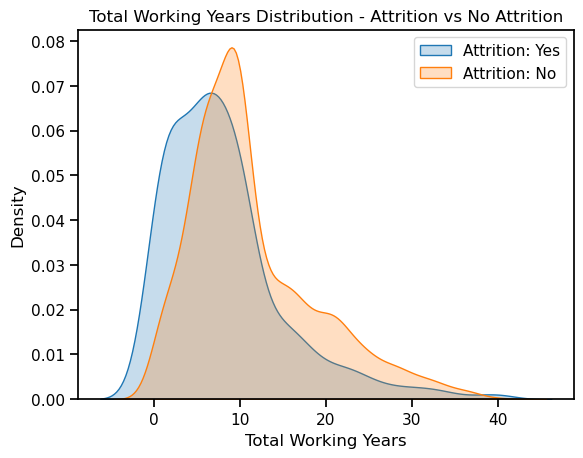

In [334]:
# Replace 'Yes' with 1 and 'No' with 0
df1['Attrition'] = df1['Attrition'].replace({'Yes': 1, 'No': 0})
# Calculate the correlation between 'Attrition' and 'TotalWorkingYears'
correlation = df1[['Attrition', 'TotalWorkingYears']].corr()['Attrition']['TotalWorkingYears']
print(f"Correlation between Attrition and Total Working Years: {correlation}")

# Visualization
sns.kdeplot(data=df1[df1['Attrition'] == 1]['TotalWorkingYears'], label='Attrition: Yes', shade=True)
sns.kdeplot(data=df1[df1['Attrition'] == 0]['TotalWorkingYears'], label='Attrition: No', shade=True)

plt.title('Total Working Years Distribution - Attrition vs No Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Density')
plt.legend()

plt.show()


the 'Attrition: Yes' curve is more towards the left than the 'Attrition: No' curve, it suggest that employees with fewer total working years are more likely to leave the company. 

## heat map


In [474]:
cat_cols=[]
for i in df.columns:
    if df[i].nunique() <= 7 or df[i].dtype == object:
        cat_cols.append(i)
df1=df.copy()
df1.drop(df1[cat_cols], axis=1, inplace=True)
df1.drop('id', axis=1, inplace=True)
corr=df1.corr().round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='GnBu')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Correlation Matrix of Employee Attrition", 
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show()

**Positive Corrleastion**:

1. Monthly Income & TotalWorkingYear  (0.76)
2. YearsAtCompany & YearsInCurrentRole(0.77)
3. YearsAtCompany & YearsWithCurrentManager(0.78)
4. YearsInCurrentRole & YearsWithCurrManager(0.73)


# data preprocessing

In [300]:
df = pd.read_csv('clena_df.csv')

In [301]:
df.shape

(3147, 36)

In [302]:
df.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,source
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0,synthetic
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0,synthetic
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0,synthetic
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0,synthetic
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1,synthetic


In [303]:
cat_cols=['BusinessTravel', 'Department', 
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 
        'OverTime', 
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'WorkLifeBalance','EmployeeCount', 'StandardHours','Over18']

## outliers handling

In [304]:
def qr_outliers(col):
    outliers = []
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    inter_qr = q3 - q1
    lower_limit = q1 - 1.5 * inter_qr
    upper_limit = q3 + 1.5 * inter_qr
    for val in col:
        if val > upper_limit or val < lower_limit:
            outliers.append(val)
    return outliers

In [305]:
#find outliers 

col_outliers=[]
for col in df.columns:
#     print("Processing column: ", col)
#     print(df[col])
    if df[col].dtype.name == 'O' or df[col].dtype.name == 'category' or  df[col].dtype.name == 'object': 
        continue
    else : 
        outliers = qr_outliers(df[col])
        if outliers != []:
            col_outliers.append(col)
#             print(col,':' ,outliers)

In [306]:
#remove the categorical columns
print(col_outliers)

['DailyRate', 'Education', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [307]:
#checking outliers for certian columns
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(df['DailyRate'])

# Create a new dataframe combining values and their corresponding z-scores
df_z_scores = pd.DataFrame({'Value': df['DailyRate'], 'Z-score': z_scores})

# Display values where the z-score > 3 or z-score < -3
outliers = df_z_scores[(df_z_scores['Z-score'] > 3) | (df_z_scores['Z-score'] < -3)]
print(outliers)


      Value   Z-score
1398   3921  7.856783


In [308]:
print(f"before outliers removal, the df.shape {df.shape}")

before outliers removal, the df.shape (3147, 36)


In [309]:
from scipy.stats import zscore

def remove_outliers(df, columns, threshold=3):
    # Copy the dataframe
    df_copy = df.copy()
    
    # Create a mask for all rows, initially set to True
    mask = pd.Series([True]*len(df_copy))
    
    # For each column, update the mask to exclude outliers
    for col in columns:
        z_scores_col = zscore(df_copy[col])
        abs_z_scores_col = np.abs(z_scores_col)
        mask = mask & (abs_z_scores_col < threshold) # '&' is logical AND, '|' would be logical OR
    
    return df_copy[mask]

# List of columns to check
cols_to_check = ['DailyRate',  'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
  'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Usage:
df_no_outliers = remove_outliers(df, cols_to_check)

In [310]:
print(f"after outliers removal, the df.shape {df_no_outliers.shape}")

after outliers removal, the df.shape (2975, 36)


We've retained about 94.5% of your data, which is generally a good outcome after outlier removal. 

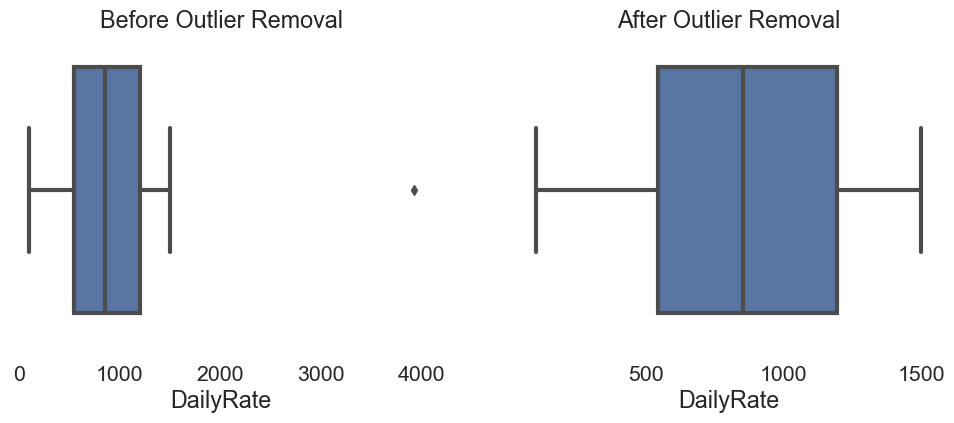

In [311]:
#visualize the before and after result 
import seaborn as sns
import matplotlib.pyplot as plt

def plot_before_after(df_before, df_after, column):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    sns.boxplot(x=df_before[column], ax=ax[0])
    ax[0].set_title('Before Outlier Removal')

    sns.boxplot(x=df_after[column], ax=ax[1])
    ax[1].set_title('After Outlier Removal')

    plt.show()

# Usage:
plot_before_after(df, df_no_outliers, 'DailyRate')


In [312]:
df_no_outliers.dtypes

id                           int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [313]:
df_no_outliers.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,source
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0,synthetic
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0,synthetic
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0,synthetic
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0,synthetic
5,5,27,Travel_Rarely,566,Research & Development,2,3,Other,1,3,Female,56,3,2,Manufacturing Director,2,Single,4197,7103,5,Y,No,11,3,4,80,0,6,0,3,1,0,1,0,0,synthetic


## Drop Zero Variance Var

In [314]:
df = df_no_outliers

In [315]:
# Checking for variables with 0 variance
norm_df=df.copy()
nzv=[]
for i in norm_df[cat_cols]:
    norm_df[i]=pd.factorize(norm_df[i])[0]
    for i in norm_df.select_dtypes(include=[np.number]).columns:
        if stdev(norm_df[i]) == 0.0:
            nzv.append(i)

# for i in norm_df.columns:
#     if stdev(norm_df[i]) == 0.0:
#         nzv.append(i)


# Converting cols to category
for i in df[cat_cols]:
    if i=='Attrition':
        continue
    df[i] = pd.Categorical(df[i])

# Removing variables with 0 variance and Employee Number
print("Dropping variables with zero variance:", nzv)
lst=set(nzv)
print(lst)
df.drop(df[lst], axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('source', axis=1, inplace=True)

Dropping variables with zero variance: ['EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'StandardHours', 'EmployeeCount', 'Over18', 'StandardHours']
{'EmployeeCount', 'StandardHours', 'Over18'}


In [316]:
df.shape

(2975, 31)

In [317]:
df['Attrition'].value_counts()

0    2552
1     423
Name: Attrition, dtype: int64

Zero variance refers to a situation where all values in a dataset or column are the same. In statistical terms, variance is a measure of how spread out a set of data is. If all values are identical, the variance is zero, because there is no "spread" or variability in the data.

In the context of machine learning or data modeling, a feature (column) with zero variance isn't useful because it doesn't contribute any information that can help the model make a prediction. This is because it has the same value for all observations, meaning it cannot differentiate between different observations.

In [318]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Yes,13,3,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,No,17,3,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,No,17,3,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,No,14,3,3,0,15,1,1,6,0,0,2,0
5,27,Travel_Rarely,566,Research & Development,2,3,Other,3,Female,56,3,2,Manufacturing Director,2,Single,4197,7103,5,No,11,3,4,0,6,0,3,1,0,1,0,0


## reduce skewness

In [319]:
# Check for variables with skew above 0.75
df2=df.copy()
original_skewness = df2.skew()
# df2 = df2.drop('Attrition', axis=1)
skew_limit = 0.75
skew_vals = df2.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

# Remove the problematic columns
skew_cols = skew_cols.drop(['Attrition','PerformanceRating', 'JobLevel','OverTime','BusinessTravel','StockOptionLevel'], errors='ignore')

display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# Log-transform skewed variables
for i in skew_cols.index.values:
    df2[i] = df2[i].apply(np.log1p)


# print(df2.skew())
# Print original skewness and skewness after transformation
skewness_after_transformation = df2.skew()

for col in skew_cols.index.values:
    print(f"Skewness before transformation for {col}: {original_skewness[col]}")
    print(f"Skewness after transformation for {col}: {skewness_after_transformation[col]}")
    print("-------------------")

,Skew
YearsSinceLastPromotion,1.811300
MonthlyIncome,1.636026
YearsAtCompany,1.202319
NumCompaniesWorked,1.074666
TotalWorkingYears,1.045954
DistanceFromHome,1.009512
PercentSalaryHike,0.850098


Skewness before transformation for YearsSinceLastPromotion: 1.8113001495398156
Skewness after transformation for YearsSinceLastPromotion: 0.7619844910807043
-------------------
Skewness before transformation for MonthlyIncome: 1.636025759961049
Skewness after transformation for MonthlyIncome: 0.33366546191508467
-------------------
Skewness before transformation for YearsAtCompany: 1.2023193897629059
Skewness after transformation for YearsAtCompany: -0.40633211730005253
-------------------
Skewness before transformation for NumCompaniesWorked: 1.0746656748958694
Skewness after transformation for NumCompaniesWorked: 0.12200494793973653
-------------------
Skewness before transformation for TotalWorkingYears: 1.045954198261002
Skewness after transformation for TotalWorkingYears: -0.7472168584597931
-------------------
Skewness before transformation for DistanceFromHome: 1.009512278733189
Skewness after transformation for DistanceFromHome: -0.0021881549690541237
-------------------
Skewne

In [320]:
df2.shape

(2975, 31)

In [321]:
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,3.218876,3,Medical,4,Male,42,3,1,Laboratory Technician,4,Married,7.862112,5099,0.693147,Yes,2.639057,3,2,1,2.397895,2,3,2.397895,0,2.079442,8,0
1,35,Travel_Rarely,921,Sales,2.197225,3,Other,1,Male,46,3,1,Sales Representative,1,Married,7.972466,10778,0.693147,No,2.890372,3,4,1,1.609438,3,3,1.609438,2,0.000000,3,0
2,32,Travel_Rarely,718,Sales,3.295837,3,Marketing,3,Male,80,3,2,Sales Executive,4,Divorced,8.439880,16495,0.000000,No,2.890372,3,4,2,1.609438,3,3,1.386294,2,0.693147,2,0
3,38,Travel_Rarely,1488,Research & Development,1.098612,3,Medical,3,Female,40,3,2,Healthcare Representative,1,Married,8.584478,13384,1.386294,No,2.708050,3,3,0,2.772589,1,1,1.945910,0,0.000000,2,0
5,27,Travel_Rarely,566,Research & Development,1.098612,3,Other,3,Female,56,3,2,Manufacturing Director,2,Single,8.342364,7103,1.791759,No,2.484907,3,4,0,1.945910,0,3,0.693147,0,0.693147,0,0


By reducing skewness in the data, we can meet the assumptions of various statistical models, reduce the impact of outliers, improve model performance, and make the data easier to understand. Methods to reduce skewness include log transformation, square root transformation, and cube root transformation, among others.

## Hypothesis Testing

### t-test (numeric var & attrition)

In [322]:
df2['Attrition'].value_counts()

0    2552
1     423
Name: Attrition, dtype: int64

In [323]:
import researchpy as rp
summary, res=rp.ttest(group1=df2['MonthlyIncome'][df2['Attrition']==1], 
                      group2=df2['MonthlyIncome'][df2['Attrition']==0], 
                      group1_name='Former Employees', group2_name='Current Employees')
print("\nSummary Statistics:")
display(summary)
display(res)


Summary Statistics:


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Former Employees,423.0,8.186168,0.605694,0.029450,8.128281,8.244055
1,Current Employees,2552.0,8.524293,0.611041,0.012096,8.500575,8.548011
2,combined,2975.0,8.476217,0.621508,0.011395,8.453874,8.498559


,Independent t-test,results
0,Difference (Former Employees - Current Employe...,-0.3381
1,Degrees of freedom =,2973.0000
2,t =,-10.5539
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.5540
7,Hedge's g =,-0.5539
8,Glass's delta1 =,-0.5582
9,Point-Biserial r =,-0.1900


We sought to discern whether there exists a significant difference between the average monthly incomes of former and current employees. To investigate this, we employed a t-test as our statistical analysis tool. 

The resultant p-value was less than our predetermined alpha level of 0.05, suggesting that the probability of observing our data or something more extreme, assuming the null hypothesis was true, is less than 5%. Therefore, we can confidently reject the null hypothesis. 

This provides us with substantial evidence to support the claim that there is indeed a significant difference between the average monthly incomes of former employees and those of current employees.

### chi-square test (categorical var & attrition)

In [324]:
# cat_cols=df.select_dtypes(include="category").columns.tolist() 
cat_cols=['BusinessTravel', 'Department', 
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 
        'OverTime', 
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'WorkLifeBalance']
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df2[cat_cols]:
    observed=pd.crosstab(index=df2["Attrition"], columns=df2[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and PerformanceRating are independent (p-value = 0.46).



,Variable,Chi_Statistic,P_value
11,OverTime,140.852889,1.732649e-32
14,StockOptionLevel,150.274403,2.299176e-32
8,JobRole,157.482802,5.372184e-30
7,JobLevel,120.390912,2.593769e-24
10,MaritalStatus,92.629894,7.685533e-21
6,JobInvolvement,72.316607,1.361736e-15
0,BusinessTravel,44.294760,2.407216e-10
4,EnvironmentSatisfaction,41.548741,5.001769e-09
9,JobSatisfaction,28.852411,2.405179e-06
15,WorkLifeBalance,27.140002,5.502593e-06


Based the chi square result,variables that are independent of attrition is PerformanceRating,therefore they will be removed from the predictors in the model.

In general, smaller p-values suggest that the corresponding variable has a more significant impact on the outcome variable. A p-value less than 0.05 is commonly interpreted as evidence of a statistically significant relationship.

Therefore, the top 3 significant predictor are : StockOptionLevel, OverTime, JobRole.

## Encode

In [325]:
df = df2

In [326]:
from pprint import pprint

labelenc = LabelEncoder()

# A dictionary to store the mappings
label_mappings = {}

# List of columns to be encoded
cols_to_encode = ['BusinessTravel', 'Department', 
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 
        'OverTime', 
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'WorkLifeBalance']

# Apply LabelEncoder to each column and store the mappings
for col in cols_to_encode:
    df2[col] = labelenc.fit_transform(df[col])
    label_mappings[col] = {index: label for index, label in enumerate(labelenc.classes_)}

print("\nLabel mappings:")
for col, mappings in label_mappings.items():
    print(f"\n{col}:")
    pprint(mappings)



Label mappings:

BusinessTravel:
{0: 'Non-Travel', 1: 'Travel_Frequently', 2: 'Travel_Rarely'}

Department:
{0: 'Human Resources', 1: 'Research & Development', 2: 'Sales'}

Education:
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 15}

EducationField:
{0: 'Human Resources',
 1: 'Life Sciences',
 2: 'Marketing',
 3: 'Medical',
 4: 'Other',
 5: 'Technical Degree'}

EnvironmentSatisfaction:
{0: 1, 1: 2, 2: 3, 3: 4}

Gender:
{0: 'Female', 1: 'Male'}

JobInvolvement:
{0: 1, 1: 2, 2: 3, 3: 4}

JobLevel:
{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 7}

JobRole:
{0: 'Healthcare Representative',
 1: 'Human Resources',
 2: 'Laboratory Technician',
 3: 'Manager',
 4: 'Manufacturing Director',
 5: 'Research Director',
 6: 'Research Scientist',
 7: 'Sales Executive',
 8: 'Sales Representative'}

JobSatisfaction:
{0: 1, 1: 2, 2: 3, 3: 4}

MaritalStatus:
{0: 'Divorced', 1: 'Married', 2: 'Single'}

OverTime:
{0: 'No', 1: 'Yes'}

PerformanceRating:
{0: 3, 1: 4}

RelationshipSatisfaction:
{0: 1, 1: 2, 2: 3, 3: 4}

StockOption

# corr

<Axes: >

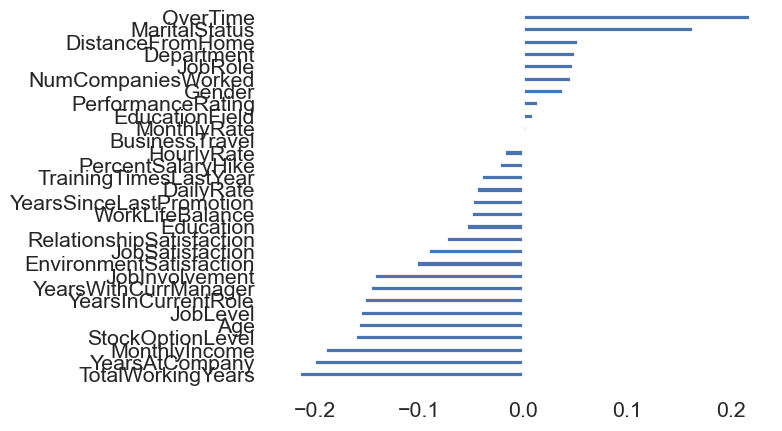

In [327]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).sort_values().plot(kind='barh')

# Feature Importance

In [328]:
y=df['Attrition']
X=df.loc[:, df.columns != 'Attrition']
X.drop(X[vars_rm], axis=1, inplace=True) #Remove the insignificant var
X=pd.get_dummies(X, columns=chi_df.Variable.values, drop_first=True)
X.columns=X.columns.str.replace(' ', '')

In [329]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (2082, 63) (2082,)
Validation set Shape: (446, 63) (446,)
Test set Shape: (447, 63) (447,)


In [330]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.transform(X_test)

## Xgboost

In [331]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

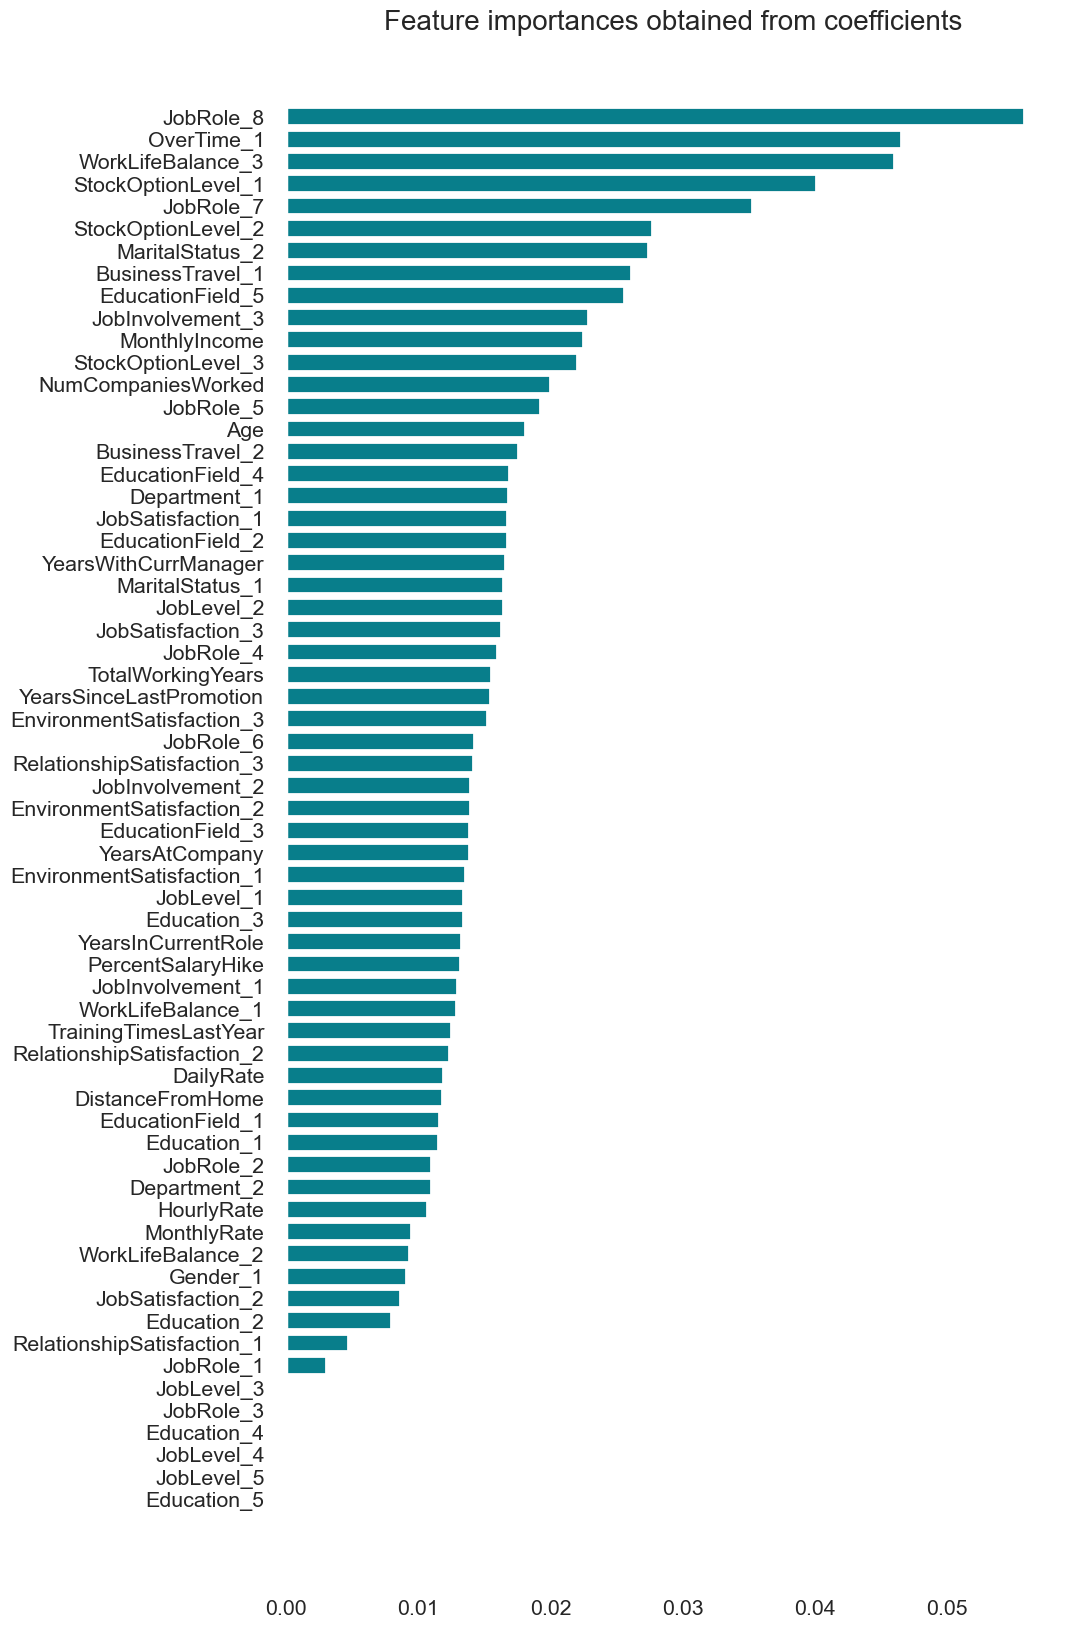

In [332]:
# Sort importances
importances = importances.sort_values(by='Importance', ascending=True)

# Now plot
plt.figure(figsize=(10, 20))  # Adjust the size here. You can change 10, 15 to any value that suits your needs.
plt.barh(y=importances['Attribute'], width=importances['Importance'], color='#087E8B')

plt.title('Feature importances obtained from coefficients', size=20)
plt.show()


## Random Forest

In [333]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score( X_val,  y_val)))


R^2 Training Score: 0.89 
OOB Score: 0.19 
R^2 Validation Score: 0.14


In [ ]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

def plot_permutation_importance(perm_imp):
    # Increase the height of the figure to 10
    plt.figure(figsize=(10, 15))
    sorted_idx = perm_imp.Importance.argsort()
    plt.barh(perm_imp.index[sorted_idx], perm_imp.Importance[sorted_idx])
    plt.xlabel('Permutation Importance')
    plt.show()

# Calculate permutation importances
perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)

# Plot the importances
plot_permutation_importance(perm_imp_rfpimp)

# Prediction

In [334]:
df.shape

(2975, 31)

In [335]:
y_test.value_counts()[0] / y_test.shape[0]

0.883668903803132

In [336]:

stay = (y_train.value_counts()[0] / y_train.shape)[0]
leave = (y_train.value_counts()[1] / y_train.shape)[0]

print("===============TRAIN=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

stay = (y_test.value_counts()[0] / y_test.shape)[0]
leave = (y_test.value_counts()[1] / y_test.shape)[0]

print("===============TEST=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")


stay = (y_val.value_counts()[0] / y_val.shape)[0]
leave = (y_val.value_counts()[1] / y_val.shape)[0]

print("===============VAL=================")
print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Leaving Rate: {leave * 100 :.2f}%")

===============TRAIN=================
Staying Rate: 85.25%
Leaving Rate: 14.75%
===============TEST=================
Staying Rate: 88.37%
Leaving Rate: 11.63%
===============VAL=================
Staying Rate: 85.65%
Leaving Rate: 14.35%


In [337]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(2082, 63)
(447, 63)
(446, 63)


### Logistic Regression

In [338]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [340]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
predictions_test = pipe.predict(X_test)

print("Predictions on Test Set:\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions_test))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, predictions_test))

# Predict on the validation set
predictions_val = pipe.predict(X_val)

print("\n\nPredictions on Validation Set:\n")

# Classification report
print("Classification Report:")
print(classification_report(y_val, predictions_val))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions_val))

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_val, predictions_val))

Predictions on Test Set:

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       395
           1       0.66      0.37      0.47        52

    accuracy                           0.90       447
   macro avg       0.79      0.67      0.71       447
weighted avg       0.89      0.90      0.89       447

Confusion Matrix:
[[385  10]
 [ 33  19]]
Accuracy Score:
0.9038031319910514


Predictions on Validation Set:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       382
           1       0.67      0.44      0.53        64

    accuracy                           0.89       446
   macro avg       0.79      0.70      0.73       446
weighted avg       0.88      0.89      0.88       446

Confusion Matrix:
[[368  14]
 [ 36  28]]
Accuracy Score:
0.8878923766816144


#### check data balance

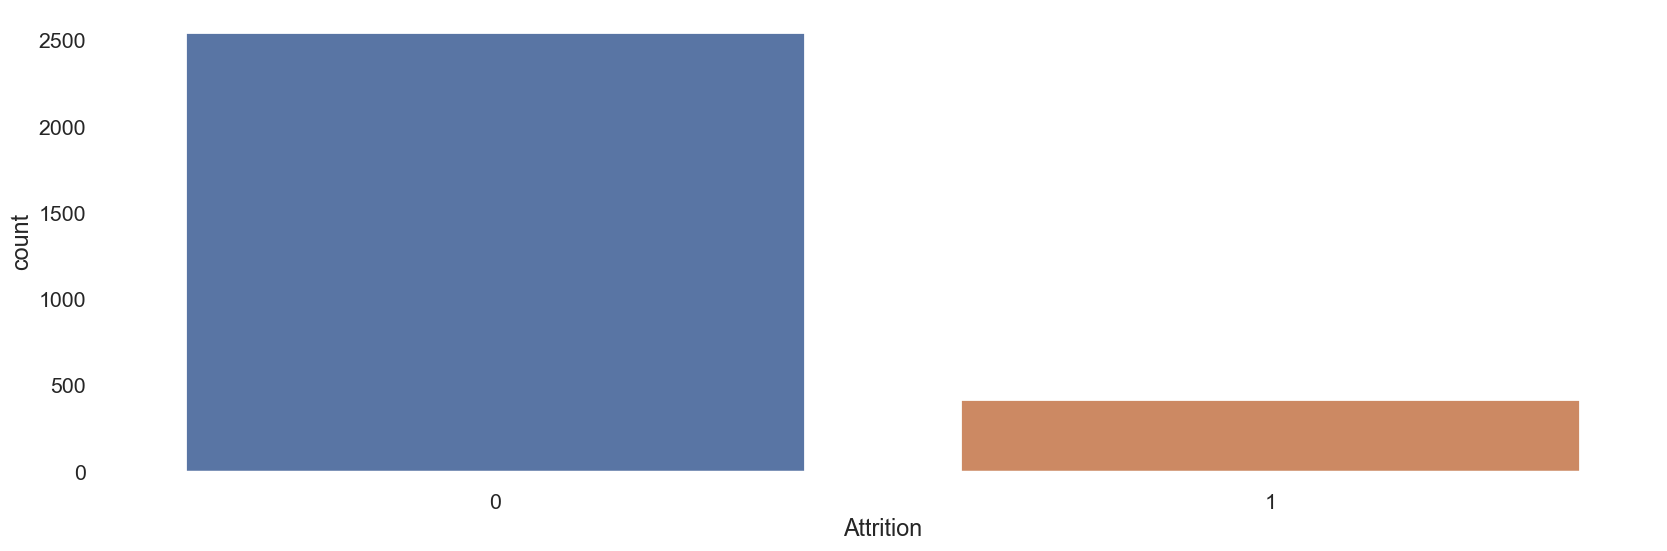

In [289]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attrition']);

### Logistic Regression - Weight Added

In [341]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [291]:
predictions2=pipe2.predict(X_test)

In [292]:
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.8769574944071589


In [293]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       386
           1       0.56      0.48      0.51        61

    accuracy                           0.88       447
   macro avg       0.74      0.71      0.72       447
weighted avg       0.87      0.88      0.87       447



In [342]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
predictions_test = pipe2.predict(X_test)

print("Predictions on Test Set:\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions_test))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, predictions_test))

# Predict on the validation set
predictions_val = pipe2.predict(X_val)

print("\n\nPredictions on Validation Set:\n")

# Classification report
print("Classification Report:")
print(classification_report(y_val, predictions_val))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions_val))

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_val, predictions_val))

Predictions on Test Set:

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       395
           1       0.48      0.56      0.51        52

    accuracy                           0.88       447
   macro avg       0.71      0.74      0.72       447
weighted avg       0.89      0.88      0.88       447

Confusion Matrix:
[[363  32]
 [ 23  29]]
Accuracy Score:
0.8769574944071589


Predictions on Validation Set:

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       382
           1       0.62      0.66      0.64        64

    accuracy                           0.89       446
   macro avg       0.78      0.79      0.79       446
weighted avg       0.90      0.89      0.89       446

Confusion Matrix:
[[356  26]
 [ 22  42]]
Accuracy Score:
0.8923766816143498


### SMOTE Added

In [343]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

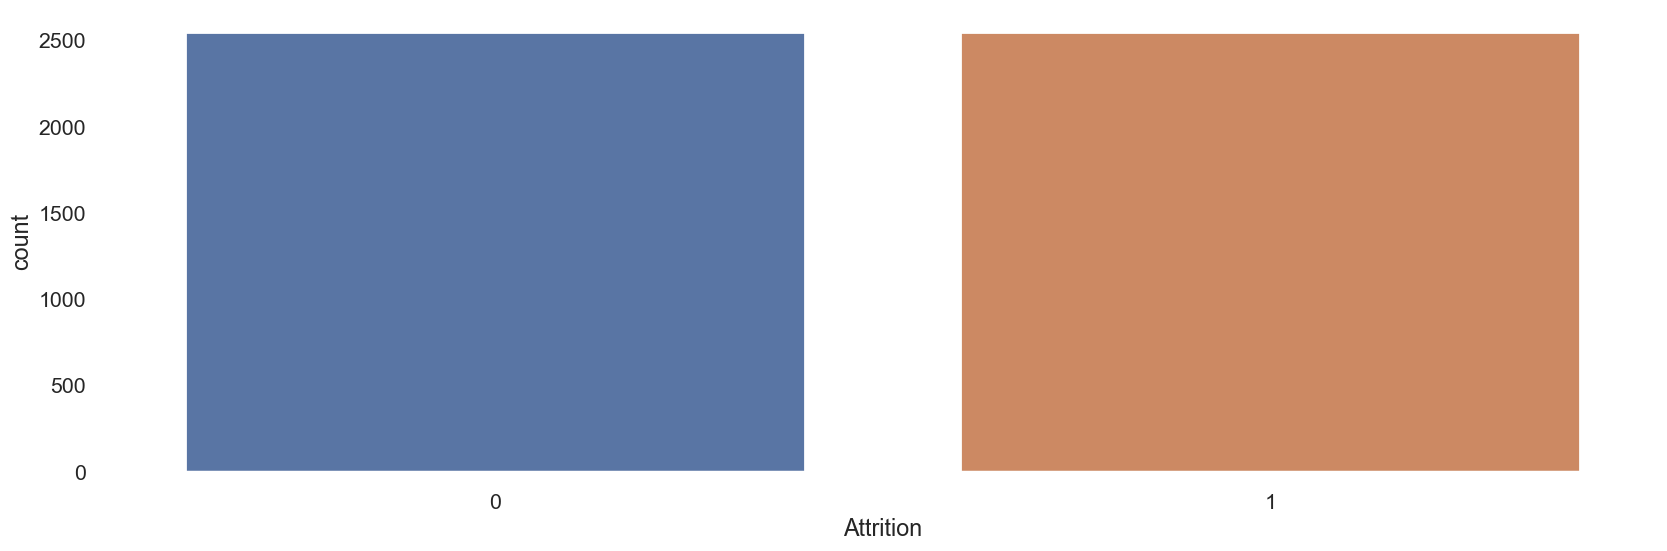

In [344]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(x=y);

In [345]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (3572, 63) (3572,)
Validation set Shape: (766, 63) (766,)
Test set Shape: (766, 63) (766,)


In [346]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe3.fit(X_train, y_train)
pipe3.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [347]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
predictions_test = pipe3.predict(X_test)

print("Predictions on Test Set:\n")

# Classification report
print("Classification Report:")
print(classification_report(y_test, predictions_test))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions_test))

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_test, predictions_test))

# Predict on the validation set
predictions_val = pipe3.predict(X_val)

print("\n\nPredictions on Validation Set:\n")

# Classification report
print("Classification Report:")
print(classification_report(y_val, predictions_val))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions_val))

# Accuracy score
print("Accuracy Score:")
print(accuracy_score(y_val, predictions_val))

Predictions on Test Set:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       376
           1       0.95      0.91      0.93       390

    accuracy                           0.93       766
   macro avg       0.93      0.93      0.93       766
weighted avg       0.93      0.93      0.93       766

Confusion Matrix:
[[357  19]
 [ 34 356]]
Accuracy Score:
0.9308093994778068


Predictions on Validation Set:

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       374
           1       0.95      0.92      0.93       392

    accuracy                           0.93       766
   macro avg       0.93      0.93      0.93       766
weighted avg       0.93      0.93      0.93       766

Confusion Matrix:
[[354  20]
 [ 33 359]]
Accuracy Score:
0.9308093994778068


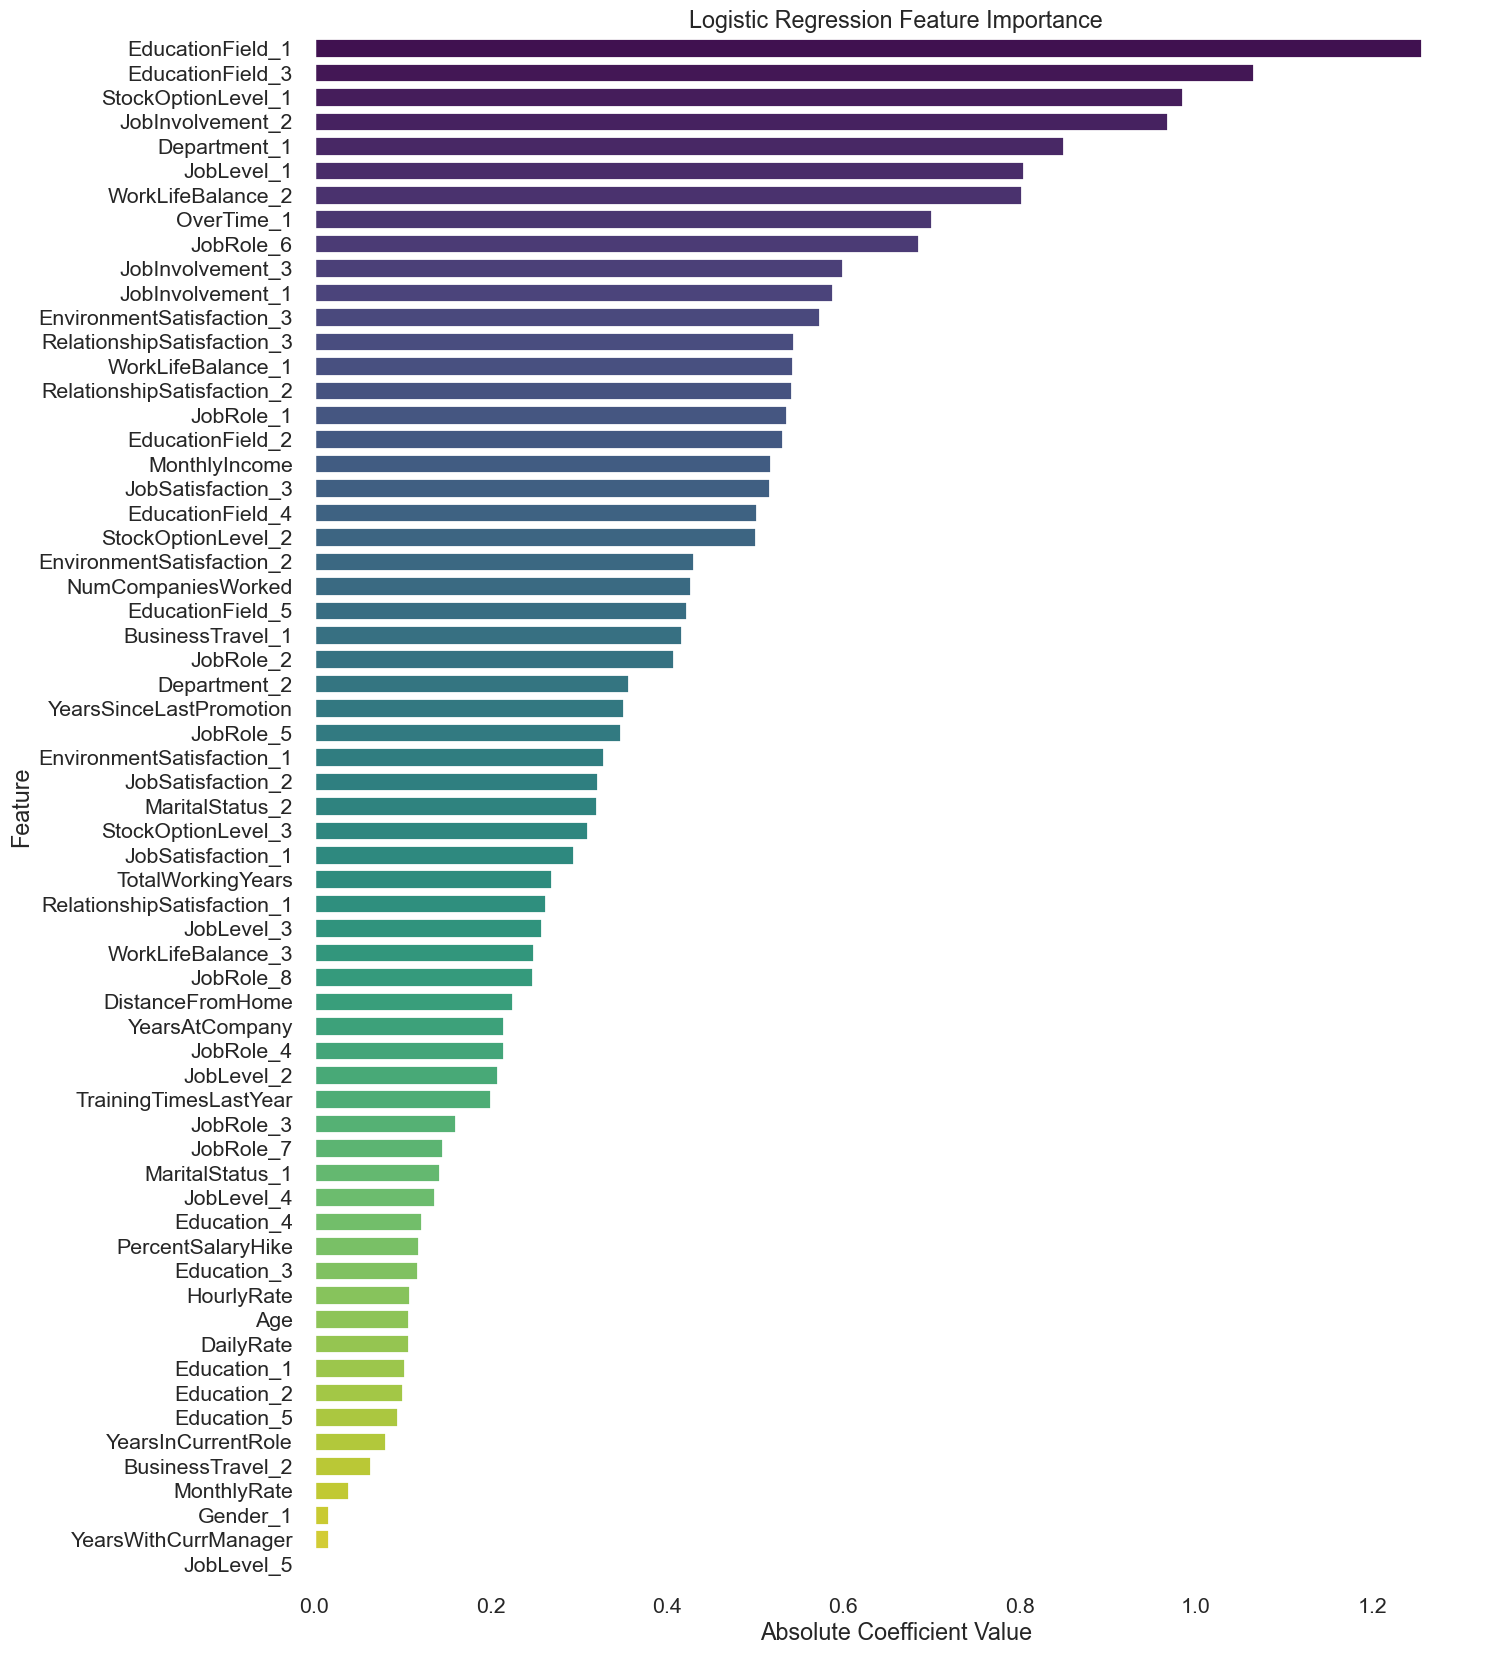

In [348]:
# Fit the pipeline
pipe3.fit(X_train, y_train)

# Get the logistic regression model
logreg = pipe3.named_steps['classifier']

# Get the coefficients
coef = logreg.coef_[0]

# Create a Series with coefficients, and sort it by absolute value
importance = pd.Series(coef, index=X_train.columns)
importance = importance.abs().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15,20))
sns.barplot(x=importance.values, y=importance.index, palette='viridis')

# Add labels and title
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Feature Importance')

# Show the plot
plt.show()


In [349]:
# Fit the pipeline
pipe3.fit(X_train, y_train)

# Get the logistic regression model
logreg = pipe3.named_steps['classifier']

# Get the coefficients
coef = logreg.coef_[0]

# Create a Series with coefficients, and sort it by absolute value
importance = pd.Series(coef, index=X_train.columns)
importance.sort_values(ascending=True)

EducationField_1          -1.255963
EducationField_3          -1.065599
StockOptionLevel_1        -0.984969
JobInvolvement_2          -0.968510
Department_1              -0.850572
                             ...   
DistanceFromHome           0.225362
YearsSinceLastPromotion    0.351072
BusinessTravel_1           0.416811
NumCompaniesWorked         0.427398
OverTime_1                 0.700757
Length: 63, dtype: float64



- The negative coefficients mean that as the feature value increases, the log-odds of the target class (1) decrease. For instance, the 'EducationField_1' feature has a coefficient of -1.256, which means that an increase in this feature value decreases the likelihood of the target class being 1.
- The positive coefficients mean that as the feature value increases, the log-odds of the target class (1) increase. For example, the 'OverTime_1' feature has a coefficient of 0.701, which means that an increase in this feature value increases the likelihood of the target class being 1.

The magnitude of these coefficients represents the effect of each feature on the prediction. For instance, 'EducationField_1' has a strong negative effect (being the highest in magnitude), while 'OverTime_1' has the strongest positive effect.
